# Using TESSreduce to get SN light curves
    
TESS offers the exciting possibility of high cadence photometry for thousands of transients across the sky, but the bright complex background can present challenges. With **TESSreduce**, we can subtract the TESS background accounting for both the smooth background and the discrete background caused by detector straps from any Target Pixel File extracted from the Full Frame Images. 

In this notebook we will go through the steps that are used in the construction of **TESSreduce** light curves. For this example lets look at SN 2020cdj, a type Ia supernova in sector 21.

This package is based on the **Lightkurve** package and operates on the **TESStargetpixelfile** class.

In [2]:
import tessreduce as tr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

If you only know the name of the transient, and not ra, dec, or sector, then you can use **sn_lookup**. Here we use it for  SN 2020cdj

In [3]:
obs = tr.sn_lookup('sn2020cdj',time='disc')

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|       14 | False    |               -177 |
|       15 | False    |               -150 |
|       16 | False    |               -124 |
|       17 | False    |                -98 |
|       18 | False    |                -73 |
|       20 | False    |                -18 |
|       21 | True     |                  0 |
|       22 | False    |                 10 |
|       23 | False    |                 39 |
|       24 | False    |                 68 |
|       25 | False    |                 95 |
|       26 | False    |                121 |
|       40 | False    |                502 |
|       41 | False    |                531 |
|       47 | False    |                691 |
|       48 | False    |                720 |
|       50 | False    |                777 |
|       51 | False    |                804 |
|       52 | False    |                830 |
|       53

We can now put the obs variable into tessreduce, and it will download the sector which overlaps the discovery time. In this case it is sector 21.

**TESSreduce** acts on tpf cuouts from FFIs, these can be input as either a string directing to the saved location of a tpf, a pre-loaded tpf in the workspace, or coordinates to get the tpf from **TESScut**. In this example we will be using **TESScut**.

We get a tpf cutout from the FFIs by utilising **TESScut** through simply giving **tessreduce** the above **obs** variable, or an ra, dec, and sector. To get an accurate assesment of the background around our target, we need a large cutout. Depending on how crowded the field is 30x30 cutouts can work, although it is better to stick to a larger 90x90 cutout and change if needed. The default size is 90x90, however, this can be changed with **tessreduce(size=Num)**.

For high level use, you can get a light curve with 1 line! 

In [7]:
tess = tr.tessreduce(obs_list=obs)

Alternatively, if you know the ra, dec, and sector, then you can enter those in instead.

getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction


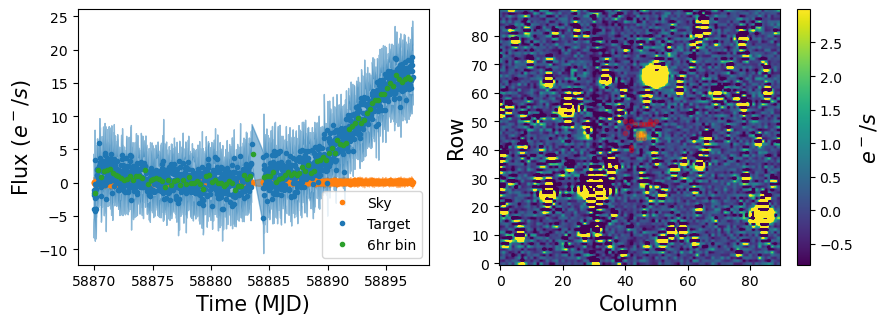

In [4]:
ra = 269.0488792
dec = 62.75700278
sector = 21
size = 90

tess = tr.tessreduce(ra=ra,dec=dec,size=size,sector=sector)

From this one command the images have been aligned, background subtracted, quantum efficiency correction is applied for strap columns, flux calibrated from field stars in the images, and the differenced light curve is calculated. Reduction products and lightcurves are saved as variables in the TESSreduce class. 
For example, if you want to access the flux:

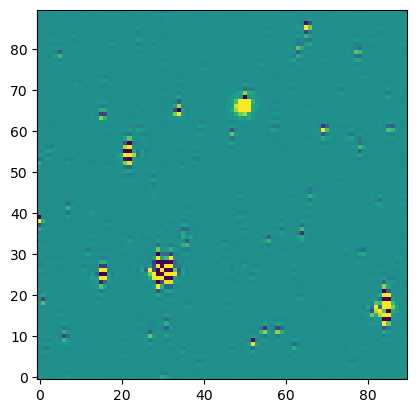

In [5]:
plt.figure()
plt.imshow(tess.flux[1200],vmax=100,vmin=-100,origin='lower');

If you want to easily plot the light curve then just use the plotter fuction! With this function we can also include public ZTF data alongside the calibrated TESS light curve, then set ground=True as follows.

Calculating field star zeropoint
Target is above -30 dec, calibrating to PS1 photometry.


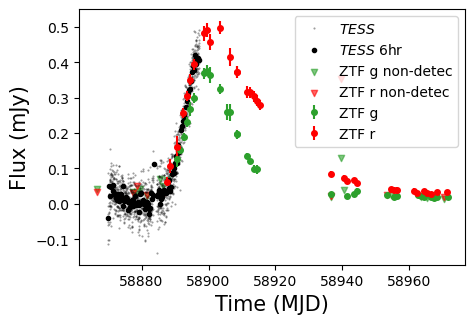

In [6]:
tess.plotter(ground=True)

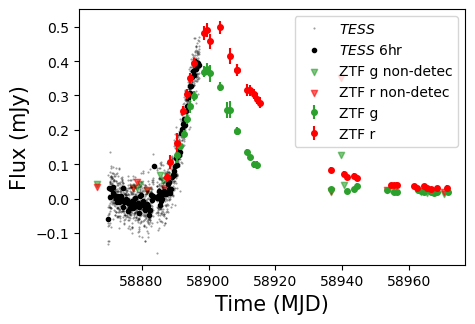

In [7]:
# subtract the baseline flux
tess.lc[1] -= np.nanmedian(tess.lc[1,:300])
tess.plotter(time_bin=6/24,ground=True)

If you want to see what sources are used in the TESS flux calibration, and how well it is determined:

Target is above -30 dec, calibrating to PS1 photometry.


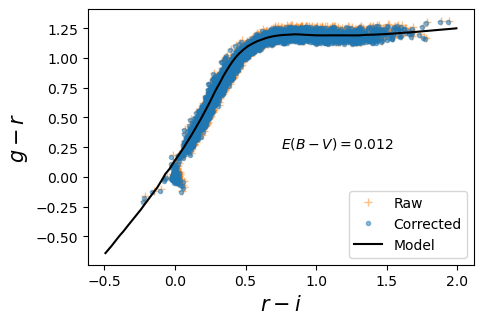

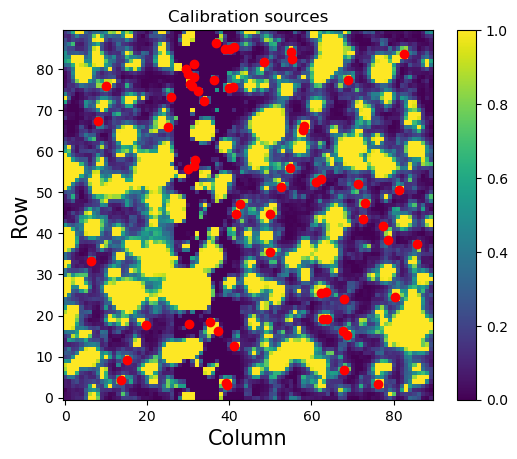

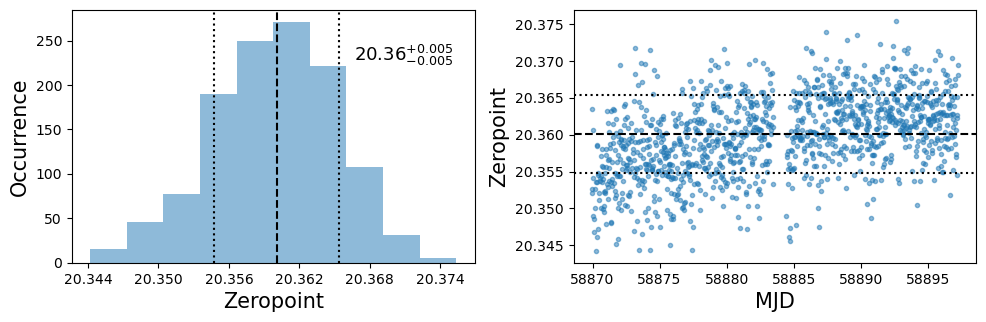

In [8]:
tess.field_calibrate(plot=True)